In [7]:
%pylab inline

import lxml
from lxml import etree
import json
import os.path as op
import glob
import xml

Populating the interactive namespace from numpy and matplotlib


# Hello world!

In [2]:
# pth = r"E:\data\scaffold\Hamamatsu\PIG-003_J-18-0165_HE.ndpi.ndpa"
pth = r"E:/data/scaffold/Hamamatsu/PIG-008_P008 LL-P_HE_parenchyme perif..ndpi.ndpa"
pth = r"C:/Users/Jirik/data/medical/orig/Scaffan-analysis/PIG-004_BBJ-004-3 _HE_parenchyme.ndpi.ndpa"
pth = r"C:/Users/Jirik/data/medical/orig/sample_data/SCP003/SCP003.ndpi.ndpa"
# pth = r"C:/Users/JirikE:/data/scaffold/Hamamatsu/PIG-008_P008 LL-P_HE_parenchyme perif..ndpi.ndpa"
tree = etree.parse(pth)

In [14]:
x
tree2 = ET.parse(pth)

In [14]:
etree.tostring(tree)

b'<annotations>\n    <ndpviewstate id="3">\n        <title/>\n        <details/>\n        <coordformat>nanometers</coordformat>\n        <lens>5,000000</lens>\n        <x>8727882</x>\n        <y>-3657468</y>\n        <z>0</z>\n        <showtitle>0</showtitle>\n        <showhistogram>0</showhistogram>\n        <showlineprofile>0</showlineprofile>\n        <annotation type="freehand" displayname="AnnotateFreehand" color="#0000ff">\n            <measuretype>0</measuretype>\n            <closed>1</closed>\n            <pointlist>\n                <point>\n                    <x>8594940</x>\n                    <y>-3741424</y>\n                </point>\n                <point>\n                    <x>8589488</x>\n                    <y>-3743241</y>\n                </point>\n                <point>\n                    <x>8587669</x>\n                    <y>-3743241</y>\n                </point>\n                <point>\n                    <x>8580395</x>\n                    <y>-3741424</y

In [15]:
viewstates = tree.xpath("//ndpviewstate")
viewstate = viewstates[1]
display(viewstate.xpath(".//title/text()"))
display(viewstate.xpath(".//details/text()"))
ptlists = viewstate.xpath(".//pointlist")
ptlist = ptlists[0]
ptlist.getchildren()
tree.getpath(ptlist)

['inner lobulus']

[]

'/annotations/ndpviewstate[2]/annotation/pointlist'

In [5]:
viewstate.xpath("./coordformat/text()")[0]

'nanometers'

In [6]:
anotations = tree.xpath("//annotation")
anot = anotations[0]
anot.get("color")
display(anot.items())
an_color = anot.get("color")

[('type', 'freehand'),
 ('displayname', 'AnnotateFreehand'),
 ('color', '#00ff00')]

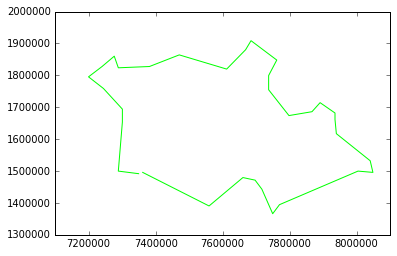

In [7]:
    
an_x = list(map(int, anot.xpath(".//pointlist/point/x/text()")))
an_y = list(map(int, anot.xpath(".//pointlist/point/y/text()")))
plt.plot(an_x, an_y, color=an_color)



# Function

In [5]:
def get_one_annotation(viewstate):
    titles_list = viewstate.xpath(".//title/text()")
    if len(titles_list) == 0:
        an_title = ""
    elif len(titles_list) == 1:
        an_title = titles_list[0]
    else:
        raise ValueError("More than one title in viewstate")
    
    annotations = viewstate.xpath(".//annotation")
    if len(annotations) > 1:
        raise ValueError("More than one annotation found")
    annot = annotations[0]
    an_color = annot.get("color")
#     display(len(annotation))
    an_x = list(map(int, annot.xpath(".//pointlist/point/x/text()")))
    an_y = list(map(int, annot.xpath(".//pointlist/point/y/text()")))
    return dict(title=an_title, color=an_color, x=an_x, y=an_y)
    
    
# get_one_annotation(viewstates[2])

In [32]:
viewstates = tree.xpath("//ndpviewstate")
# display(viewstates)
all_anotations = list(map(get_one_annotation, viewstates))
all_anotations

[{'title': '',
  'color': '#00ff00',
  'x': [7574386,
   7566584,
   7549418,
   7526015,
   7505730,
   7488564,
   7468277,
   7451114,
   7433948,
   7424585,
   7419908,
   7416789,
   7415228,
   7415228,
   7415228,
   7415228,
   7415228,
   7416789,
   7418347,
   7421466,
   7426146,
   7432391,
   7438632,
   7444870,
   7452675,
   7462039,
   7471395,
   7480759,
   7487003,
   7496367,
   7505730,
   7511968,
   7518209,
   7527576,
   7535375,
   7549418,
   7561900,
   7568145,
   7579066,
   7583746,
   7593113,
   7614955,
   7632121,
   7649280,
   7660204,
   7666449,
   7674248,
   7682053,
   7692972,
   7700777,
   7707018,
   7711698,
   7713259,
   7716378,
   7716378,
   7716378,
   7716378,
   7716378,
   7716378,
   7721062,
   7721062,
   7724184,
   7724184,
   7727303,
   7727303],
  'y': [-1867439,
   -1869001,
   -1869001,
   -1865878,
   -1858066,
   -1848694,
   -1836196,
   -1823697,
   -1809638,
   -1798702,
   -1790890,
   -1779954,
   -1767457,
   

# Pure python

In [79]:
def get_one_annotation2(viewstate):
    def get_text(el):
        return el.text
    titles_list = viewstate.findall(".//title")
    if len(titles_list) == 0:
        an_title = ""
    elif len(titles_list) == 1:
        an_title = titles_list[0].text
        if an_title is None:
            an_title = ''
    else:
        raise ValueError("More than one title in viewstate")
    
    annotations = viewstate.findall(".//annotation")
    if len(annotations) > 1:
        raise ValueError("More than one annotation found")
    annot = annotations[0]
    an_color = annot.get("color")
#     display(len(annotation))
    an_x = list(map(int, map(get_text, annot.findall(".//pointlist/point/x"))))
    an_y = list(map(int, map(get_text, annot.findall(".//pointlist/point/y"))))
    return dict(title=an_title, color=an_color, x=an_x, y=an_y)
    
    
# get_one_annotation(viewstates[2])

In [60]:

titles_list = viewstates[2].findall(".//pointlist/point/x")
titles_list[5].text

def get_text(el):
    return el.text
# [t.text for t in titles_list]

In [73]:

titles_list = viewstates[2].findall(".//title")
titles_list[0].text is None

# def get_text(el):
#     return el.text
# [t.text for t in titles_list]

True

In [78]:
viewstates = tree2.findall("//ndpviewstate")
# display(viewstates)
all_anotations2 = list(map(get_one_annotation2, viewstates))
all_anotations2

C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: This search is broken in 1.3 and earlier, and will be fixed in a future version.  If you rely on the current behaviour, change it to './/ndpviewstate'
  """Entry point for launching an IPython kernel.


[{'title': None,
  'color': '#00ff00',
  'x': [7574386,
   7566584,
   7549418,
   7526015,
   7505730,
   7488564,
   7468277,
   7451114,
   7433948,
   7424585,
   7419908,
   7416789,
   7415228,
   7415228,
   7415228,
   7415228,
   7415228,
   7416789,
   7418347,
   7421466,
   7426146,
   7432391,
   7438632,
   7444870,
   7452675,
   7462039,
   7471395,
   7480759,
   7487003,
   7496367,
   7505730,
   7511968,
   7518209,
   7527576,
   7535375,
   7549418,
   7561900,
   7568145,
   7579066,
   7583746,
   7593113,
   7614955,
   7632121,
   7649280,
   7660204,
   7666449,
   7674248,
   7682053,
   7692972,
   7700777,
   7707018,
   7711698,
   7713259,
   7716378,
   7716378,
   7716378,
   7716378,
   7716378,
   7716378,
   7721062,
   7721062,
   7724184,
   7724184,
   7727303,
   7727303],
  'y': [-1867439,
   -1869001,
   -1869001,
   -1865878,
   -1858066,
   -1848694,
   -1836196,
   -1823697,
   -1809638,
   -1798702,
   -1790890,
   -1779954,
   -1767457,
 

In [76]:
all_anotations2

[{'title': '',
  'color': '#00ff00',
  'x': [7574386,
   7566584,
   7549418,
   7526015,
   7505730,
   7488564,
   7468277,
   7451114,
   7433948,
   7424585,
   7419908,
   7416789,
   7415228,
   7415228,
   7415228,
   7415228,
   7415228,
   7416789,
   7418347,
   7421466,
   7426146,
   7432391,
   7438632,
   7444870,
   7452675,
   7462039,
   7471395,
   7480759,
   7487003,
   7496367,
   7505730,
   7511968,
   7518209,
   7527576,
   7535375,
   7549418,
   7561900,
   7568145,
   7579066,
   7583746,
   7593113,
   7614955,
   7632121,
   7649280,
   7660204,
   7666449,
   7674248,
   7682053,
   7692972,
   7700777,
   7707018,
   7711698,
   7713259,
   7716378,
   7716378,
   7716378,
   7716378,
   7716378,
   7716378,
   7721062,
   7721062,
   7724184,
   7724184,
   7727303,
   7727303],
  'y': [-1867439,
   -1869001,
   -1869001,
   -1865878,
   -1858066,
   -1848694,
   -1836196,
   -1823697,
   -1809638,
   -1798702,
   -1790890,
   -1779954,
   -1767457,
   

In [11]:
fn = "annotations.json"
with open(fn, 'w') as outfile:
    json.dump(all_anotations, outfile)

# Convert from .ndpa to .json

In [5]:


def ndpa_file_to_json(pth):
    tree = etree.parse(pth)
    viewstates = tree.xpath("//ndpviewstate")
    all_anotations = list(map(get_one_annotation, viewstates))
    fn = pth + ".json"
    with open(fn, 'w') as outfile:
        json.dump(all_anotations, outfile)

In [13]:
# pth = r"E:\data\scaffold\Hamamatsu\PIG-003_J-18-0165_HE.ndpi.ndpa"
# ndpa_file_to_json(pth)

# Convert whole directory

In [6]:
def ndpa_to_json(path):
    """
    :param path: path to file or dir contaning .ndpa files
    """
    if op.isfile(path):
        ndpa_file_to_json(path)
    else:
        extended_path = op.join(path, "*.ndpa")
#         print(extended_path)
        files = glob.glob(extended_path)
        for fl in files:
            ndpa_file_to_json(fl)
        
    
    

In [11]:
ndpa_to_json(r"e:data/scaffold/Hamamatsu/")